### State Schema with DataClass
- when we define a Langchain StateGraph , we use a state Schema

- The State Schema represents the structure and types of data that our graph will use.

- All nodes are expected to commmunicate with that schema
- Langgraph offers flexibility in how your state schema , accomodating various python types and validation approches! 

### TypedDict
- We can use the typedDict class from the Python's typing module
- It allows you to specify keys and their corresponding values types
- But,note that these are type hints
- They can be used by static type checkers(like mypy) or IDE'S to cattch poetential type-related errors before the code is run
- but , they are not enforced at runtime

In [58]:
from typing_extensions import TypedDict
from typing import Literal,Annotated


class TypedDictState(TypedDict):
    name : Annotated[str,"give the name"]
    game:Literal["Cricket","Badminton"]

In [59]:
def play_game(state:TypedDictState):
    print("---Play Game Node has been called---")
    return {"name":state['name'] + " Want to play "}

def cricket(state:TypedDictState):
    print("-- Cricket Node has been called--")
    # return {"game":"Cricket"}   
    return {"name":state['name']+"cricket" ,"game":"Cricket"}


def badminton(state:TypedDictState):
    print("-- badminton Node has been called--")
    # return {"game":"Badminton"}    
    return {"name":state['name']+"cricket" ,"game":"Badminton"}


In [60]:
import random 
def decide_play(state:TypedDictState)->Literal["cricket","badminton"]:
    #Here, let's jusr do 50/50 split between nodes 2,3
    if random.random() > 0.5:
        return "cricket" 
    else:
        return "badminton"

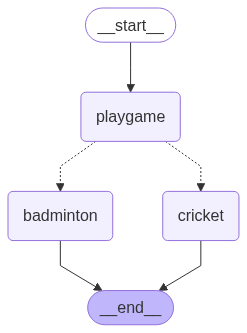

In [61]:
import random
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END 


builder = StateGraph(TypedDictState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)


## Flow  of the Grapg
builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

#add
graph = builder.compile()

#disply
display(Image(graph.get_graph().draw_mermaid_png()))


In [62]:
graph.invoke({'name':"Mohan"})

---Play Game Node has been called---
-- Cricket Node has been called--


{'name': 'Mohan Want to play cricket', 'game': 'Cricket'}

In [63]:
graph.invoke({'name':"Ram"})

---Play Game Node has been called---
-- Cricket Node has been called--


{'name': 'Ram Want to play cricket', 'game': 'Cricket'}

In [49]:
graph.invoke({'name':"Mohan"})

---Play Game Node has been called---
-- Cricket Node has been called--


{'name': 'Mohan Want to play ', 'game': 'Cricket'}

### Dataclasses
- Python's Dataclasses provide another way to define structures data.
- Dataclasses offer a concise syntax for creating classes that are primarily used to store data. 

In [65]:
### DataClasses

from dataclasses import dataclass



@dataclass
class DataClassState:
    name : str 
    game:Literal["badmintion","cricket"]

    

In [66]:
def play_game(state:DataClassState):
    print("---Play Game Node has been called---")
    return {"name":state.name + " Want to play "}

def cricket(state:DataClassState):
    print("-- Cricket Node has been called--")
    # return {"game":"Cricket"}   
    return {"name":state.name+"cricket" ,"game":"Cricket"}


def badminton(state:DataClassState):
    print("-- badminton Node has been called--")
    # return {"game":"Badminton"}    
    return {"name":state.name+"cricket" ,"game":"Badminton"}


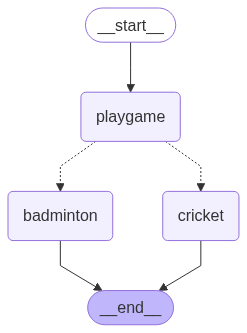

In [67]:
import random
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END 


builder = StateGraph(DataClassState)
builder.add_node("playgame",play_game)
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)


## Flow  of the Grapg
builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

#add
graph = builder.compile()

#disply
display(Image(graph.get_graph().draw_mermaid_png()))


In [68]:
graph.invoke(DataClassState(name = "Mohan",game = "cricket"))

---Play Game Node has been called---
-- Cricket Node has been called--


{'name': 'Mohan Want to play cricket', 'game': 'Cricket'}